In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
graph_file = "../data/example_data/chr5.yeast.gfa"

In [3]:
a = dict()
with open(graph_file) as file: 
    for line in file.readlines(): 
        if line.startswith("S"): 
            ls = line.split()
            a[int(ls[1])] = len(ls[2])

In [4]:
a

{1: 21176,
 2: 15530,
 3: 15530,
 4: 24351,
 5: 24367,
 6: 100,
 7: 1,
 8: 1,
 9: 15,
 10: 1,
 11: 1,
 12: 65,
 13: 1,
 14: 1,
 15: 18,
 16: 1,
 17: 1,
 18: 91,
 19: 1,
 20: 1,
 21: 48,
 22: 1,
 23: 1,
 24: 95,
 25: 1,
 26: 1,
 27: 3,
 28: 1,
 29: 1,
 30: 9,
 31: 1,
 32: 1,
 33: 56,
 34: 1,
 35: 1,
 36: 83,
 37: 1,
 38: 1,
 39: 92,
 40: 1,
 41: 1,
 42: 25,
 43: 1,
 44: 1,
 45: 15,
 46: 1,
 47: 18,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 30,
 54: 1,
 55: 1,
 56: 13,
 57: 1,
 58: 1,
 59: 7,
 60: 1,
 61: 1,
 62: 41,
 63: 1,
 64: 1,
 65: 15,
 66: 1,
 67: 1,
 68: 32,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 84,
 75: 13,
 76: 4727,
 77: 18837,
 78: 22,
 79: 1,
 80: 1,
 81: 55,
 82: 2,
 83: 2,
 84: 228,
 85: 1,
 86: 1,
 87: 143,
 88: 1,
 89: 1,
 90: 227,
 91: 1,
 92: 1,
 93: 252,
 94: 1,
 95: 1,
 96: 46,
 97: 1,
 98: 1,
 99: 96,
 100: 1,
 101: 1,
 102: 95,
 103: 1,
 104: 1,
 105: 249,
 106: 1,
 107: 1,
 108: 20,
 109: 1,
 110: 1,
 111: 22,
 112: 1,
 113: 1,
 114: 34,
 115: 1,
 116: 1

In [5]:
df = pd.read_csv("../data/test/yeast/analysis/analysis.nwindow.yeast.txt", sep = "\t")

In [6]:
df

,node,sequence,jumps
0,46,67248,17506
1,18,46889,166
2,18,46889,151
3,40,74624,8008
4,40,74640,7971
...,...,...,...
26229,21,10964,130
26230,20,10872,126
26231,20,10872,139
26232,18,10877,121


In [7]:
df

,node,sequence,jumps
0,46,67248,17506
1,18,46889,166
2,18,46889,151
3,40,74624,8008
4,40,74640,7971
...,...,...,...
26229,21,10964,130
26230,20,10872,126
26231,20,10872,139
26232,18,10877,121


In [8]:
gem = 0
oo = []
for x in df.index: 
    oo.append(gem + a[x+1])
    gem += a[x+1]
print(oo[:20])

[21176, 36706, 52236, 76587, 100954, 101054, 101055, 101056, 101071, 101072, 101073, 101138, 101139, 101140, 101158, 101159, 101160, 101251, 101252, 101253]


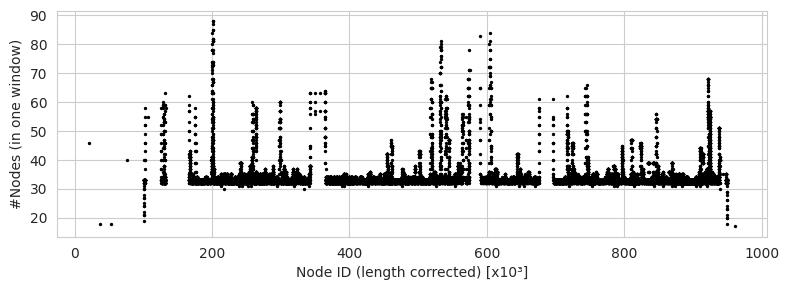

In [16]:
plt.figure(figsize = (8,3))
plt.scatter(np.array(oo)/1000, df["node"], color = "black", s = 2)
plt.ylabel("#Nodes (in one window)")
plt.xlabel("Node ID (length corrected) [x10³]")
plt.tight_layout()
#plt.savefig("plots/nwindow.node.pdf")

plt.show()

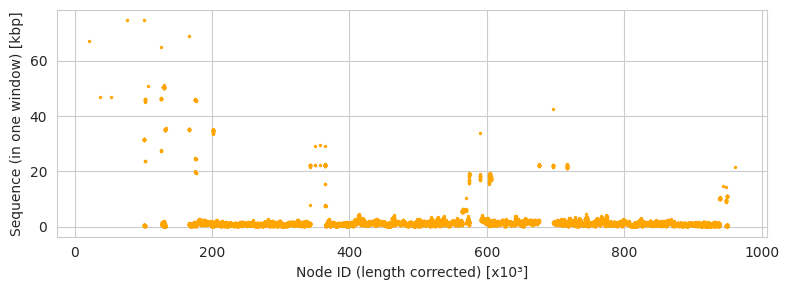

In [17]:
plt.figure(figsize = (8,3))
plt.scatter(np.array(oo)/1000, df["sequence"]/1000, color = "orange", s = 2)
plt.ylabel("Sequence (in one window) [kbp]")
plt.xlabel("Node ID (length corrected) [x10³]")
plt.tight_layout()
#plt.savefig("plots/nwindow.sequence.png")
#plt.savefig("plots/nwindow.sequence.pdf")

plt.show()

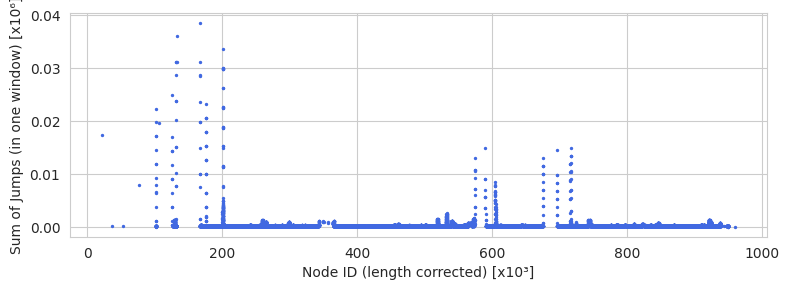

In [18]:
plt.figure(figsize = (8,3))
plt.scatter(np.array(oo)/1000, df["jumps"]/1000000, color = "royalblue", s = 2)
plt.ylabel("Sum of Jumps (in one window) [x10⁶]")
plt.xlabel("Node ID (length corrected) [x10³]")
plt.tight_layout()
#plt.savefig("plots/nwindow.jumps.png")
#plt.savefig("plots/nwindow.jumps.pdf")
plt.show()